In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
data = pd.read_csv("COVID-19-time-series-clean-complete.csv")

data.head(4)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0


In [34]:
data['Date'] = pd.to_datetime(data['Date'])
data['YearMonth'] = data['Date'].map(lambda date: 100*date.year + date.month)

data_month_4 = data.query('YearMonth==202004')

data_month_4_cases = data_month_4.groupby(['Country/Region'])['New cases'].sum().reset_index()
data_month_4_cases_sort = data_month_4_cases.sort_values('New cases')
data_month_4_cases_sort.tail(8)

,Country/Region,New cases
65,Germany,91201
84,Italy,99671
142,Russia,104161
178,Turkey,106673
162,Spain,127546
183,United Kingdom,139956
61,France,140313
179,US,888804


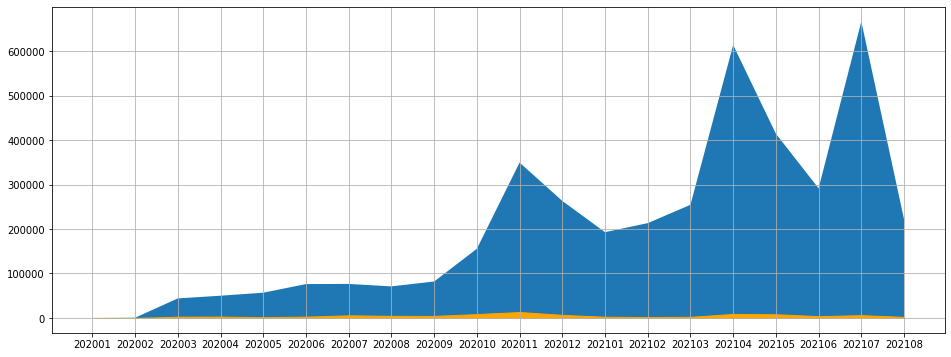

In [35]:
data_iran = data.loc[(data['Country/Region']=='Iran')]

iran_deaths = data_iran.groupby(['YearMonth'])['New deaths'].sum().reset_index()
iran_cases = data_iran.groupby(['YearMonth'])['New cases'].sum().reset_index()

plt.figure(figsize=(16,6))
plt.fill_between(iran_cases['YearMonth'].to_numpy(dtype=str), iran_cases['New cases'], alpha=1)
plt.fill_between(iran_deaths['YearMonth'].to_numpy(dtype=str), iran_deaths['New deaths'], color='orange')
plt.grid()